In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"]=(20,10)

In [2]:
df1=pd.read_csv("_sold.csv")
df1.head(7)

,latitude,longitude,streetAddress,suburb,postcode,region,bedrooms,bathrooms,parkingSpaces,propertyType,price,listingId,title,dateSold,modifiedDate
0,-38.276067,144.485488,6 Corymbia Circuit,Barwon Heads,3227,bellarine_peninsula,3,2,2,house,"$1,255,000",129714950,Luxurious Coastal Lifestyle Awaits,06-11-2018,2018-11-06T02:00:19Z
1,-38.238159,144.545576,9 La Bella Street,Ocean Grove,3226,bellarine_peninsula,4,2,2,house,"$725,000",129219294,Laid Back Family Living In An Idyllic Location,06-11-2018,2018-11-06T04:01:41Z
2,-37.638387,144.922701,26 Greensted Grove,Roxburgh Park,3064,melbourne___northern_region,4,2,2,house,"$670,000",129517974,Oversized & park-facing,06-11-2018,2018-11-06T02:37:57Z
3,-38.121844,144.332476,80 Calvert Street,Hamlyn Heights,3215,NaN,3,2,1,house,"$600,000",129640018,Cherished Family Home In Leafy Hamlyn Heights,06-11-2018,2018-11-06T02:00:19Z
4,-38.129071,144.323640,295 Church Street,Herne Hill,3218,bellarine_peninsula,3,1,2,house,"$520,000",129459426,Potential Plus,06-11-2018,2018-11-06T02:00:17Z
5,-38.661799,143.858154,42 Ridge Drive,Kennett River,3234,south_western_region,3,2,3,house,"$515,000",129671886,RELAXED COASTAL LIFESTYLE,06-11-2018,2018-11-06T02:00:19Z
6,-38.032635,144.383849,16 Yoorok Drive,Lara,3212,south_west_melbourne,3,1,1,house,"$460,000",129206754,"PERFECT INVESTMENT, PERFECT HOME!",06-11-2018,2018-11-06T06:12:30Z


In [3]:
df1.shape

(105120, 15)

In [4]:
df1.groupby('propertyType')['propertyType'].agg('count')

propertyType
acreage/semi-rural        8
alpine                    1
apartment             20927
farmlet                   1
house                 63195
lifestyle                 2
other                     1
residential land         10
townhouse              5273
unit                  15697
villa                     5
Name: propertyType, dtype: int64

In [5]:

df1=df1[df1.propertyType!='acreage/semi-rural']
df1=df1[df1.propertyType!='alpine']
df1=df1[df1.propertyType!='farmlet']
df1=df1[df1.propertyType!='lifestyle']
df1=df1[df1.propertyType!='other']
df1=df1[df1.propertyType!='villa']
df1=df1[df1.propertyType!='residential land']


In [6]:
df1.groupby('propertyType')['propertyType'].agg('count')

propertyType
apartment    20927
house        63195
townhouse     5273
unit         15697
Name: propertyType, dtype: int64

In [7]:
df1.groupby('suburb')['suburb'].agg('count')

suburb
Abbotsford      4
Aireys Inlet    1
Airport West    2
Albert Park     1
Albion          1
               ..
Wollert         3
Woodend         1
Yallambie       2
Yarra Glen      1
Yarraville      2
Name: suburb, Length: 360, dtype: int64

In [8]:
df1.groupby('region')['region'].agg('count')

region
bayside                               63
bellarine_peninsula                10479
eastern_melbourne                   5317
gippsland                          10425
inner_east_melbourne                5291
melbourne___northern_region         5398
melbourne_city___greater_region    10454
mornington_peninsula                  56
north_east_region                  15627
north_west_melbourne                5254
northern_region                       30
south_east_melbourne                5291
south_west_melbourne                  36
south_western_region                  14
western_melbourne                     27
western_region                     26090
Name: region, dtype: int64

In [9]:
df1.groupby('postcode')['postcode'].agg('count')

postcode
3000       2
3003       1
3004       5
3006    5215
3008       3
        ... 
3975       2
3976       2
3977       6
3978       3
3981    5207
Name: postcode, Length: 241, dtype: int64

In [10]:
df2=df1.drop(["longitude","latitude","streetAddress","suburb","postcode","listingId","title","modifiedDate","dateSold"],axis='columns')
df2.head()

,region,bedrooms,bathrooms,parkingSpaces,propertyType,price
0,bellarine_peninsula,3,2,2,house,"$1,255,000"
1,bellarine_peninsula,4,2,2,house,"$725,000"
2,melbourne___northern_region,4,2,2,house,"$670,000"
3,NaN,3,2,1,house,"$600,000"
4,bellarine_peninsula,3,1,2,house,"$520,000"


In [11]:
df2.isnull().sum()
df3=df2.dropna()

In [12]:
df4=df3[df3.price!="Contact agent"]
df4[df4.price=="Contact agent"]

,region,bedrooms,bathrooms,parkingSpaces,propertyType,price


In [13]:
def convert_price(price):
    new_price = price.replace(',','').replace('$','')
    return float(new_price)

In [14]:
df4['price'] = df4['price'].apply(convert_price)

C:\Users\chait\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [15]:
df4.head()

,region,bedrooms,bathrooms,parkingSpaces,propertyType,price
0,bellarine_peninsula,3,2,2,house,1255000.0
1,bellarine_peninsula,4,2,2,house,725000.0
2,melbourne___northern_region,4,2,2,house,670000.0
4,bellarine_peninsula,3,1,2,house,520000.0
5,south_western_region,3,2,3,house,515000.0


In [16]:
df4["bedrooms"].unique()

array([ 3,  4,  5,  6,  2,  1,  7, 13], dtype=int64)

In [17]:
df4["bathrooms"].unique()

array([2, 1, 4, 3, 5], dtype=int64)

In [18]:
df4["parkingSpaces"].unique()

array([ 2,  3,  1,  5,  6,  4,  0, 10,  8, 12, 14,  7], dtype=int64)

In [19]:
df5=df4[df4.parkingSpaces < 7]
df5["parkingSpaces"].unique()

array([2, 3, 1, 5, 6, 4, 0], dtype=int64)

In [20]:
df6=df5[df5.bedrooms < 7]

In [21]:
df6["bedrooms"].unique()

array([3, 4, 5, 6, 2, 1], dtype=int64)

In [22]:
df6["bathrooms"].unique()

array([2, 1, 4, 3, 5], dtype=int64)

In [23]:
df6.head()

,region,bedrooms,bathrooms,parkingSpaces,propertyType,price
0,bellarine_peninsula,3,2,2,house,1255000.0
1,bellarine_peninsula,4,2,2,house,725000.0
2,melbourne___northern_region,4,2,2,house,670000.0
4,bellarine_peninsula,3,1,2,house,520000.0
5,south_western_region,3,2,3,house,515000.0


In [24]:
df7=df6.copy()
df7["price_per_bedroom"]=df7["price"]/df7["bedrooms"]
df7.tail(20)

,region,bedrooms,bathrooms,parkingSpaces,propertyType,price,price_per_bedroom
105099,western_region,3,2,2,house,330000.0,110000.000000
105100,eastern_melbourne,3,1,1,unit,471000.0,157000.000000
105101,inner_east_melbourne,2,1,1,apartment,470000.0,235000.000000
105102,western_region,4,2,2,house,470000.0,117500.000000
105103,north_east_region,3,2,2,house,465000.0,155000.000000
105104,bellarine_peninsula,3,2,2,townhouse,460000.0,153333.333333
105105,melbourne___northern_region,2,2,1,house,455000.0,227500.000000
105106,western_region,3,2,2,house,455000.0,151666.666667
105107,gippsland,3,1,2,house,452500.0,150833.333333
105109,north_west_melbourne,2,2,1,apartment,447000.0,223500.000000


In [25]:
grp2=df7.groupby("region")
grp2
for region, region_df in grp2:
    print(region)
    print(region_df["price_per_bedroom"].mean())

bayside
371905.5555555556
bellarine_peninsula
184774.85208510933
eastern_melbourne
159308.87789275634
gippsland
164414.1087130197
inner_east_melbourne
237486.38962472408
melbourne___northern_region
228449.62486105965
melbourne_city___greater_region
397561.12918141525
mornington_peninsula
240924.84276729563
north_east_region
123520.84373199349
north_west_melbourne
223619.7823465956
northern_region
141770.11494252871
south_east_melbourne
114538.2379354854
south_west_melbourne
203919.4761904762
south_western_region
194567.3076923077
western_melbourne
246518.51851851848
western_region
126968.67365583155


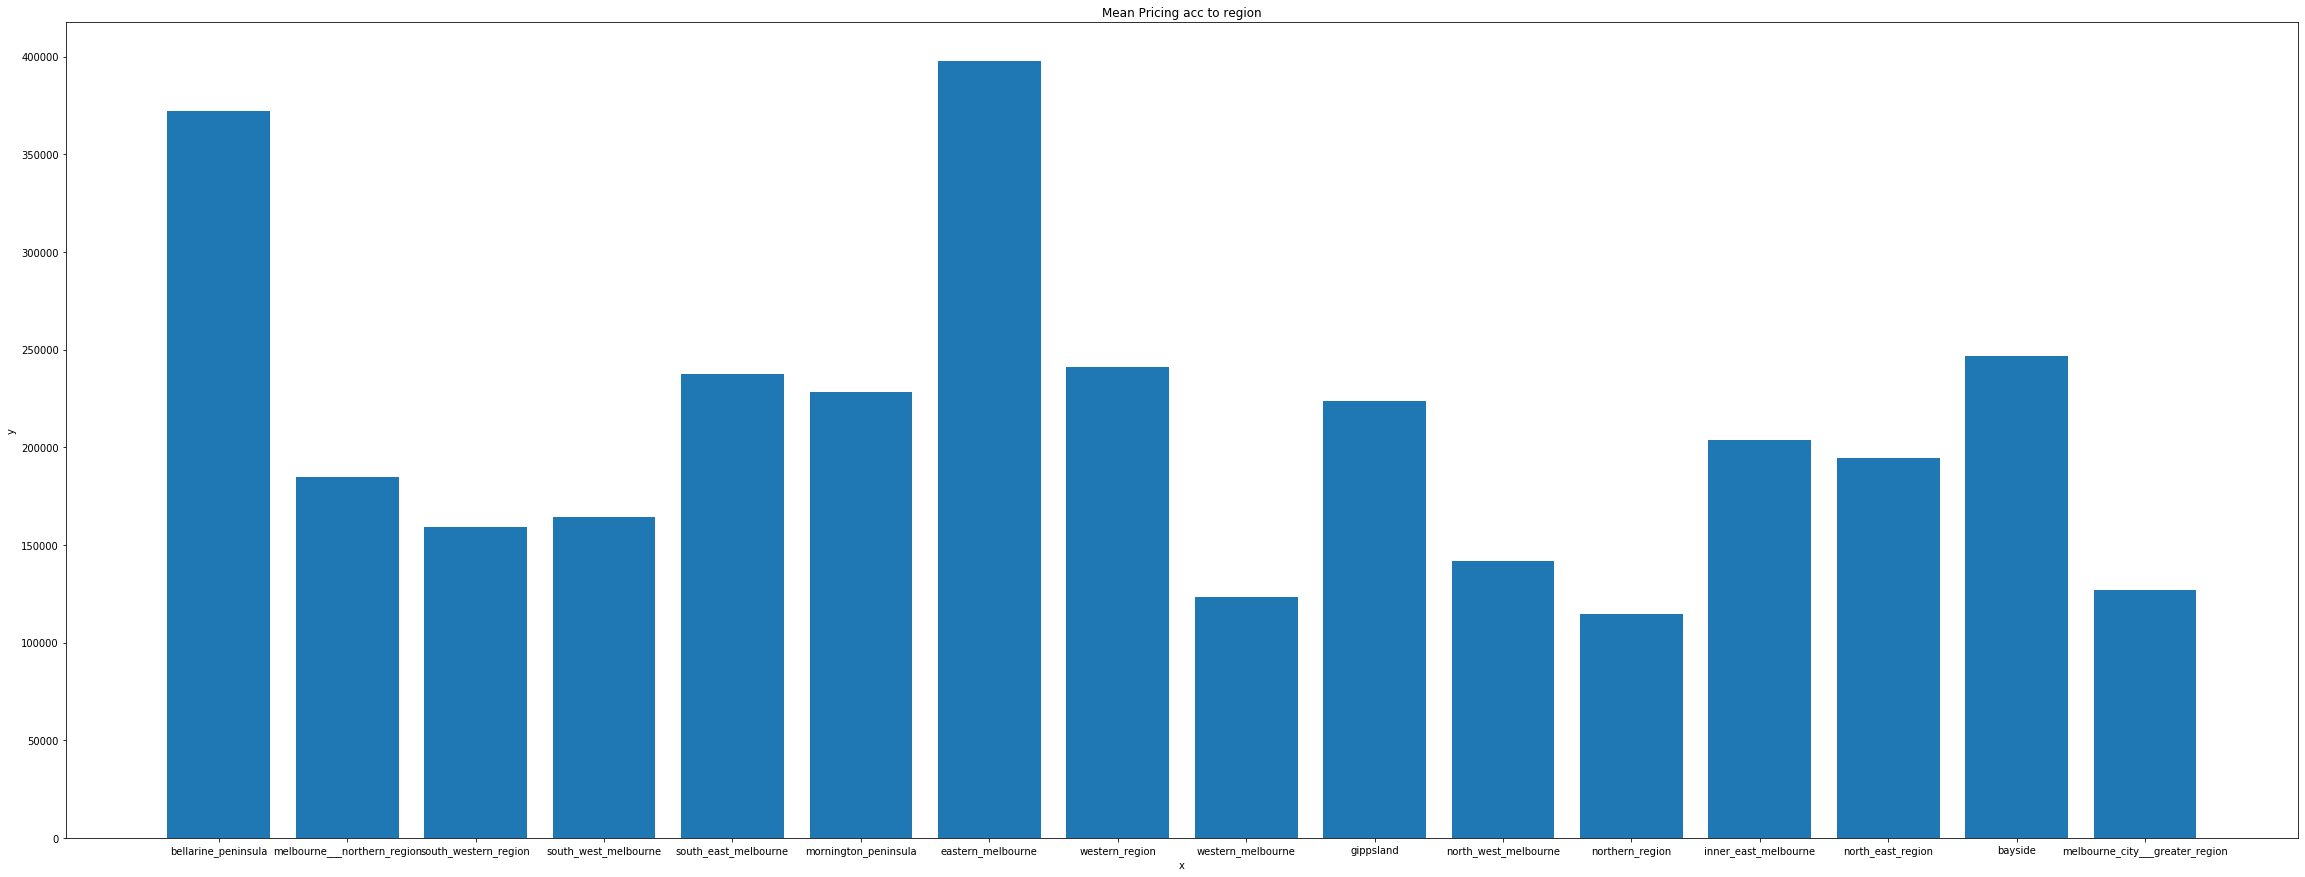

In [26]:
matplotlib.rcParams["figure.figsize"] = (40,15)
x=df7.region.unique()
y=[]
for region, region_df in grp2:
    y.append(region_df["price_per_bedroom"].mean())
plt.bar(x,y)
plt.xlabel('x')
plt.ylabel('y')
plt.title("Mean Pricing acc to region")
plt.show()


[array(['house', 'apartment', 'unit', 'townhouse'], dtype=object)]
[313390.26310212404, 137343.4961775107, 154993.6903181012, 184044.8005766535]


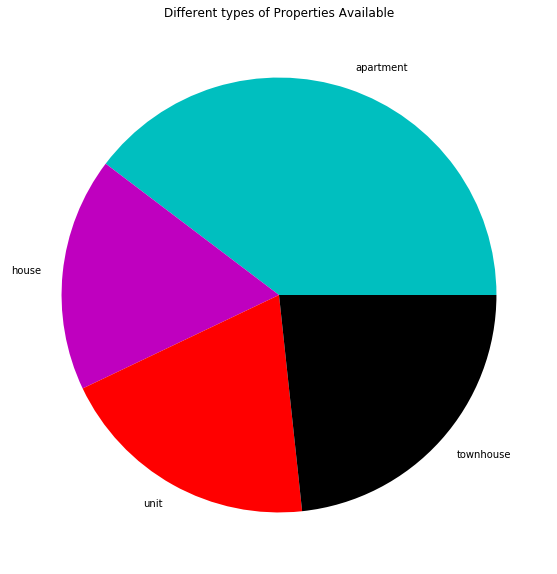

In [27]:
grp1=df7.groupby("propertyType")
grp1
slices=[]
matplotlib.rcParams["figure.figsize"] = (15,10)
for propertyType, property_df in grp1:
    slices.append(property_df["price_per_bedroom"].mean())
properties=[]
properties.append(df7.propertyType.unique())
print(properties)
print(slices)
cols=['c','m','r','k']
plt.pie(slices, labels=['apartment', 'house', 'unit', 'townhouse'], colors=cols)
plt.title("Different types of Properties Available")
plt.show()

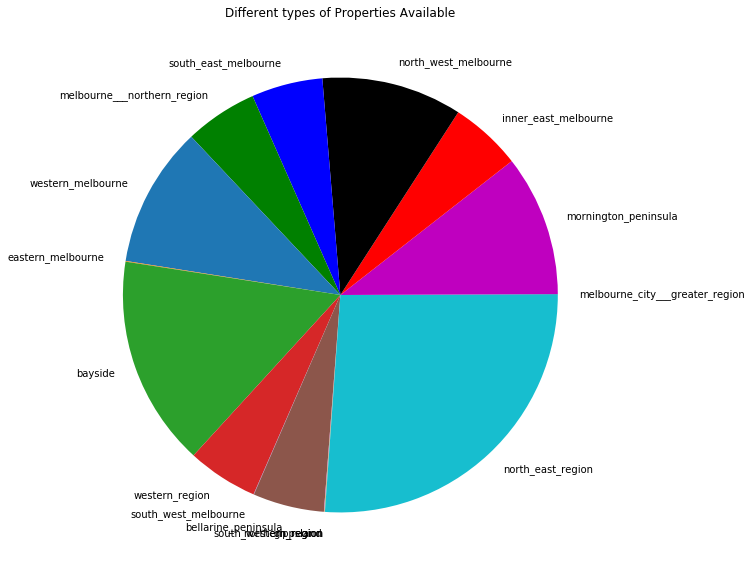

In [28]:
slices=[]
matplotlib.rcParams["figure.figsize"] = (15,10)
for region, region_df in grp2:
    slices.append(region_df["region"].count())
properties=[]
properties.append(df7.region.unique())
matplotlib.rcParams['lines.linewidth'] =5
plt.rcParams['patch.edgecolor'] = 'black'
cols=['c','m','r','k','b','g','tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']
plt.pie(slices, labels=['melbourne_city___greater_region', 'mornington_peninsula',
       'inner_east_melbourne', 'north_west_melbourne',
       'south_east_melbourne', 'melbourne___northern_region',
       'western_melbourne', 'eastern_melbourne', 'bayside',
       'western_region', 'south_west_melbourne', 'bellarine_peninsula',
       'gippsland', 'south_western_region', 'northern_region',
       'north_east_region'], colors=cols)
plt.title("Different types of Properties Available")
plt.show()

In [29]:
df7.groupby(['propertyType','region']).size()

propertyType  region                         
apartment     bayside                                8
              eastern_melbourne                      1
              inner_east_melbourne                5239
              melbourne___northern_region           21
              melbourne_city___greater_region    10434
              mornington_peninsula                   1
              north_west_melbourne                5212
              south_western_region                   1
              western_melbourne                      2
house         bayside                               30
              bellarine_peninsula                   54
              eastern_melbourne                     84
              gippsland                           5217
              inner_east_melbourne                  34
              melbourne___northern_region         5347
              melbourne_city___greater_region       15
              mornington_peninsula                  45
              north

In [30]:
temp1=df7[df7.propertyType=="acreage/semi-rural"]
temp2=df7[df7.propertyType=="apartment"]
temp3=df7[df7.propertyType=="house"]
temp4=df7[df7.propertyType=="townhouse"]
temp5=df7[df7.propertyType=="unit"]
temp6=df7[df7.propertyType=="villa"]

In [31]:
def remove_pps_outliers(df):
    df_out= pd.DataFrame()
    for key, subdf in df.groupby('region'):
        m=np.mean(subdf.price_per_bedroom)
        st=np.std(subdf.price_per_bedroom)
        reduced_df = subdf[(subdf.price_per_bedroom > (m-st)) & (subdf.price_per_bedroom < (m+st))]
        df_out = pd.concat([df_out,reduced_df], ignore_index=True)
    return df_out
                     

In [32]:
t1=remove_pps_outliers(temp1)
t2=remove_pps_outliers(temp2)
t3=remove_pps_outliers(temp3)
t4=remove_pps_outliers(temp4)
t5=remove_pps_outliers(temp5)
t6=remove_pps_outliers(temp6)

In [33]:
df8 = pd.concat([t1, t2, t3, t4,t5,t6])
df8.reset_index(drop=True, inplace=True)

In [34]:
df8

,region,bedrooms,bathrooms,parkingSpaces,propertyType,price,price_per_bedroom
0,bayside,2,1,1,apartment,610000.0,305000.00
1,bayside,2,2,1,apartment,630000.0,315000.00
2,bayside,2,1,2,apartment,620000.0,310000.00
3,bayside,2,2,1,apartment,602500.0,301250.00
4,bayside,1,1,1,apartment,365000.0,365000.00
...,...,...,...,...,...,...,...
78560,south_east_melbourne,2,1,1,unit,362000.0,181000.00
78561,south_east_melbourne,1,1,1,unit,250000.0,250000.00
78562,south_east_melbourne,4,2,2,unit,640001.0,160000.25
78563,south_east_melbourne,2,1,0,unit,475000.0,237500.00


In [35]:
df8.propertyType.unique()

array(['apartment', 'house', 'townhouse', 'unit'], dtype=object)

In [36]:
def remove_pps_outliers(df):
    df_out= pd.DataFrame()
    for key, subdf in df.groupby('propertyType'):
        m=np.mean(subdf.price_per_bedroom)
        st=np.std(subdf.price_per_bedroom)
        reduced_df = subdf[(subdf.price_per_bedroom > (m-st)) & (subdf.price_per_bedroom < (m+st))]
        df_out = pd.concat([df_out,reduced_df], ignore_index=True)
    return df_out

df9=remove_pps_outliers(df8)
df9

,region,bedrooms,bathrooms,parkingSpaces,propertyType,price,price_per_bedroom
0,bayside,2,1,1,apartment,610000.0,305000.000000
1,bayside,2,2,1,apartment,630000.0,315000.000000
2,bayside,2,1,2,apartment,620000.0,310000.000000
3,bayside,2,2,1,apartment,602500.0,301250.000000
4,bayside,1,1,1,apartment,365000.0,365000.000000
...,...,...,...,...,...,...,...
52219,north_west_melbourne,2,1,1,unit,376000.0,188000.000000
52220,north_west_melbourne,3,2,2,unit,530000.0,176666.666667
52221,south_east_melbourne,2,1,1,unit,378000.0,189000.000000
52222,south_east_melbourne,2,1,1,unit,362000.0,181000.000000


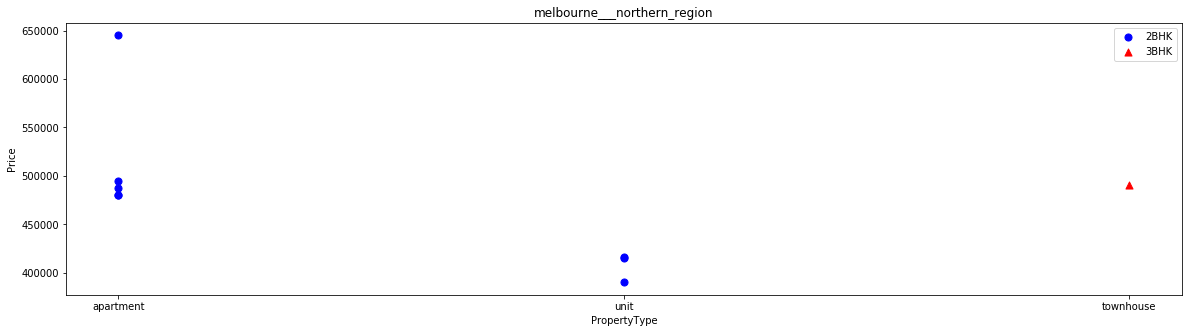

In [37]:
def plot_scatter_chart(df,region):
    
    bhk2= df9[(df9.region==region) & (df9.bedrooms==2)]
    bhk3= df9[(df9.region==region) & (df9.bedrooms==3)]
    matplotlib.rcParams['figure.figsize'] = (20,5)
    plt.scatter(bhk2.propertyType,bhk2.price,color='blue',label='2BHK',s=50)
    plt.scatter(bhk3.propertyType,bhk3.price,marker='^',color='red',label='3BHK',s=50)
    plt.xlabel("PropertyType")
    plt.ylabel("Price")
    plt.title(region)
    plt.legend()
    
plot_scatter_chart(df9,"melbourne___northern_region")

In [38]:
df9[df9.region=="north_east_region"]

,region,bedrooms,bathrooms,parkingSpaces,propertyType,price,price_per_bedroom
15684,north_east_region,4,2,2,house,447500.0,111875.000000
15685,north_east_region,3,2,2,house,400000.0,133333.333333
15686,north_east_region,3,1,6,house,335000.0,111666.666667
15687,north_east_region,3,2,2,house,388000.0,129333.333333
15688,north_east_region,3,2,2,house,388000.0,129333.333333
...,...,...,...,...,...,...,...
20889,north_east_region,3,2,2,house,388000.0,129333.333333
20890,north_east_region,3,2,2,house,388000.0,129333.333333
20891,north_east_region,3,2,2,house,388000.0,129333.333333
20892,north_east_region,3,2,2,house,388000.0,129333.333333


In [39]:
grp1=df9.groupby("propertyType")
grp1
for propertyType, property_df in grp1:
    print(propertyType)
    print(property_df["price_per_bedroom"].mean())

apartment
295011.0008628128
house
127793.59464831128
townhouse
153338.51567499165
unit
178015.9445775818


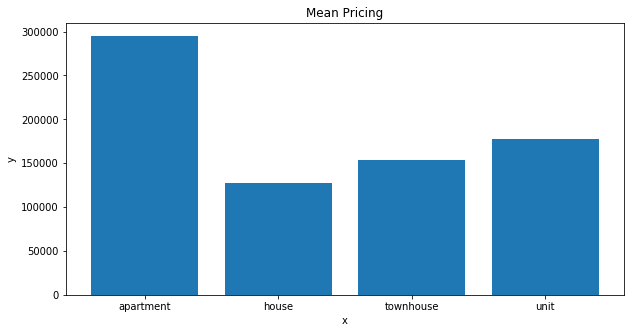

['apartment' 'house' 'townhouse' 'unit']
[295011.0008628128, 127793.59464831128, 153338.51567499165, 178015.9445775818]


In [40]:
matplotlib.rcParams["figure.figsize"] = (10,5)
x=df9.propertyType.unique()
y=[]
for propertyType, property_df in grp1:
    y.append(property_df["price_per_bedroom"].mean())
plt.bar(x,y)
plt.xlabel('x')
plt.ylabel('y')
plt.title("Mean Pricing")
plt.show()
print(x)
print(y)

In [41]:
df10=df9.drop(["region"], axis='columns')
df10

,bedrooms,bathrooms,parkingSpaces,propertyType,price,price_per_bedroom
0,2,1,1,apartment,610000.0,305000.000000
1,2,2,1,apartment,630000.0,315000.000000
2,2,1,2,apartment,620000.0,310000.000000
3,2,2,1,apartment,602500.0,301250.000000
4,1,1,1,apartment,365000.0,365000.000000
...,...,...,...,...,...,...
52219,2,1,1,unit,376000.0,188000.000000
52220,3,2,2,unit,530000.0,176666.666667
52221,2,1,1,unit,378000.0,189000.000000
52222,2,1,1,unit,362000.0,181000.000000


In [42]:
df10.groupby('propertyType')['propertyType'].agg('count')

propertyType
apartment    10431
house        31367
townhouse     5210
unit          5216
Name: propertyType, dtype: int64

In [43]:
dummies = pd.get_dummies(df10.propertyType)
dummies.head(3)

,apartment,house,townhouse,unit
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0


In [44]:
df10 = pd.concat([df10,dummies],axis='columns')
df10

,bedrooms,bathrooms,parkingSpaces,propertyType,price,price_per_bedroom,apartment,house,townhouse,unit
0,2,1,1,apartment,610000.0,305000.000000,1,0,0,0
1,2,2,1,apartment,630000.0,315000.000000,1,0,0,0
2,2,1,2,apartment,620000.0,310000.000000,1,0,0,0
3,2,2,1,apartment,602500.0,301250.000000,1,0,0,0
4,1,1,1,apartment,365000.0,365000.000000,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
52219,2,1,1,unit,376000.0,188000.000000,0,0,0,1
52220,3,2,2,unit,530000.0,176666.666667,0,0,0,1
52221,2,1,1,unit,378000.0,189000.000000,0,0,0,1
52222,2,1,1,unit,362000.0,181000.000000,0,0,0,1


In [45]:
df11=df10.drop(["price_per_bedroom","propertyType"], axis='columns')
df11

,bedrooms,bathrooms,parkingSpaces,price,apartment,house,townhouse,unit
0,2,1,1,610000.0,1,0,0,0
1,2,2,1,630000.0,1,0,0,0
2,2,1,2,620000.0,1,0,0,0
3,2,2,1,602500.0,1,0,0,0
4,1,1,1,365000.0,1,0,0,0
...,...,...,...,...,...,...,...,...
52219,2,1,1,376000.0,0,0,0,1
52220,3,2,2,530000.0,0,0,0,1
52221,2,1,1,378000.0,0,0,0,1
52222,2,1,1,362000.0,0,0,0,1


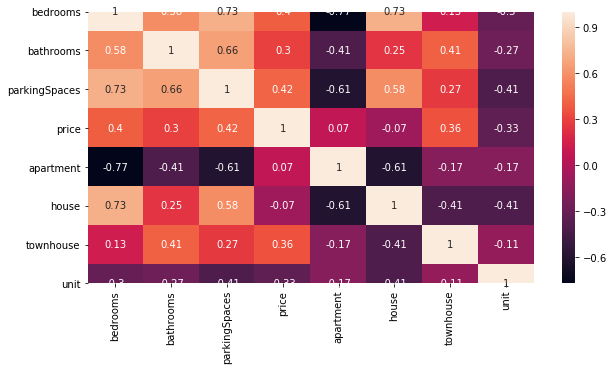

In [46]:
import seaborn as sns
df_oh = pd.DataFrame(df11, columns = df11.columns)

correlation_matrix = df_oh.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)

In [47]:
cols = list(df11.columns)
cols.pop(cols.index('price'))
df11 = df11[cols+['price']]
df11

,bedrooms,bathrooms,parkingSpaces,apartment,house,townhouse,unit,price
0,2,1,1,1,0,0,0,610000.0
1,2,2,1,1,0,0,0,630000.0
2,2,1,2,1,0,0,0,620000.0
3,2,2,1,1,0,0,0,602500.0
4,1,1,1,1,0,0,0,365000.0
...,...,...,...,...,...,...,...,...
52219,2,1,1,0,0,0,1,376000.0
52220,3,2,2,0,0,0,1,530000.0
52221,2,1,1,0,0,0,1,378000.0
52222,2,1,1,0,0,0,1,362000.0


In [48]:
X = df11.drop(['price'],axis='columns')
X.head(3)

,bedrooms,bathrooms,parkingSpaces,apartment,house,townhouse,unit
0,2,1,1,1,0,0,0
1,2,2,1,1,0,0,0
2,2,1,2,1,0,0,0


In [49]:
Y = df11["price"]
Y.head(3)

0    610000.0
1    630000.0
2    620000.0
Name: price, dtype: float64

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error
import seaborn as sns
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2, random_state=1)

In [51]:
np.expand_dims(X_train, axis=0)
np.expand_dims(y_train, axis=0)

X_train.shape, X_test.shape, y_train.shape, y_test.shape


((41779, 7), (10445, 7), (41779,), (10445,))

In [53]:
reg = LinearRegression()
reg.fit(X_train, y_train)

y_train_predict = reg.predict(X_train)
rmse = (np.sqrt(mean_squared_error(y_train, y_train_predict)))
r2 = round(reg.score(X_train, y_train),2)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")


The model performance for training set
--------------------------------------
RMSE is 16620.1511794283
R2 score is 0.89




In [54]:
y_pred = reg.predict(X_test)
rmse = (np.sqrt(mean_squared_error(y_test, y_pred)))
r2 = round(reg.score(X_test, y_test),2)

print("The model performance for test set")
print("--------------------------------------")
print("Root Mean Squared Error: {}".format(rmse))
print("R^2: {}".format(r2))
print("\n")

The model performance for test set
--------------------------------------
Root Mean Squared Error: 15878.603058304521
R^2: 0.9




Text(0.5, 0, 'Predicted price')

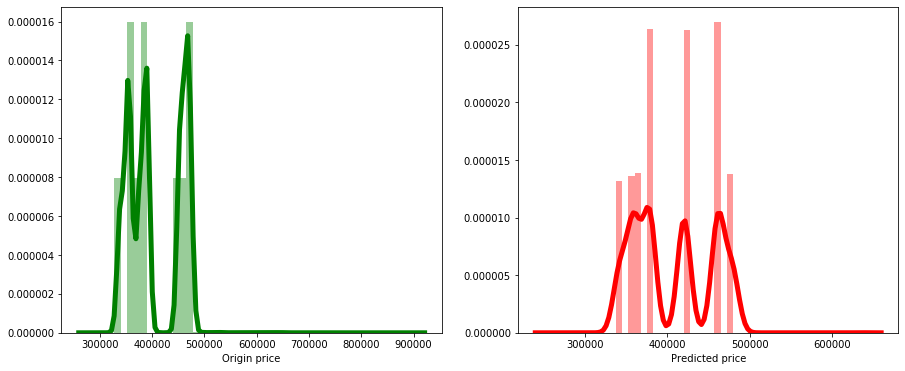

In [55]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.distplot(df11["price"], bins=50, color='green')
plt.xlabel('Origin price')
plt.subplot(1,2,2)
sns.distplot(y_pred, bins=50, color='red')
plt.xlabel('Predicted price')

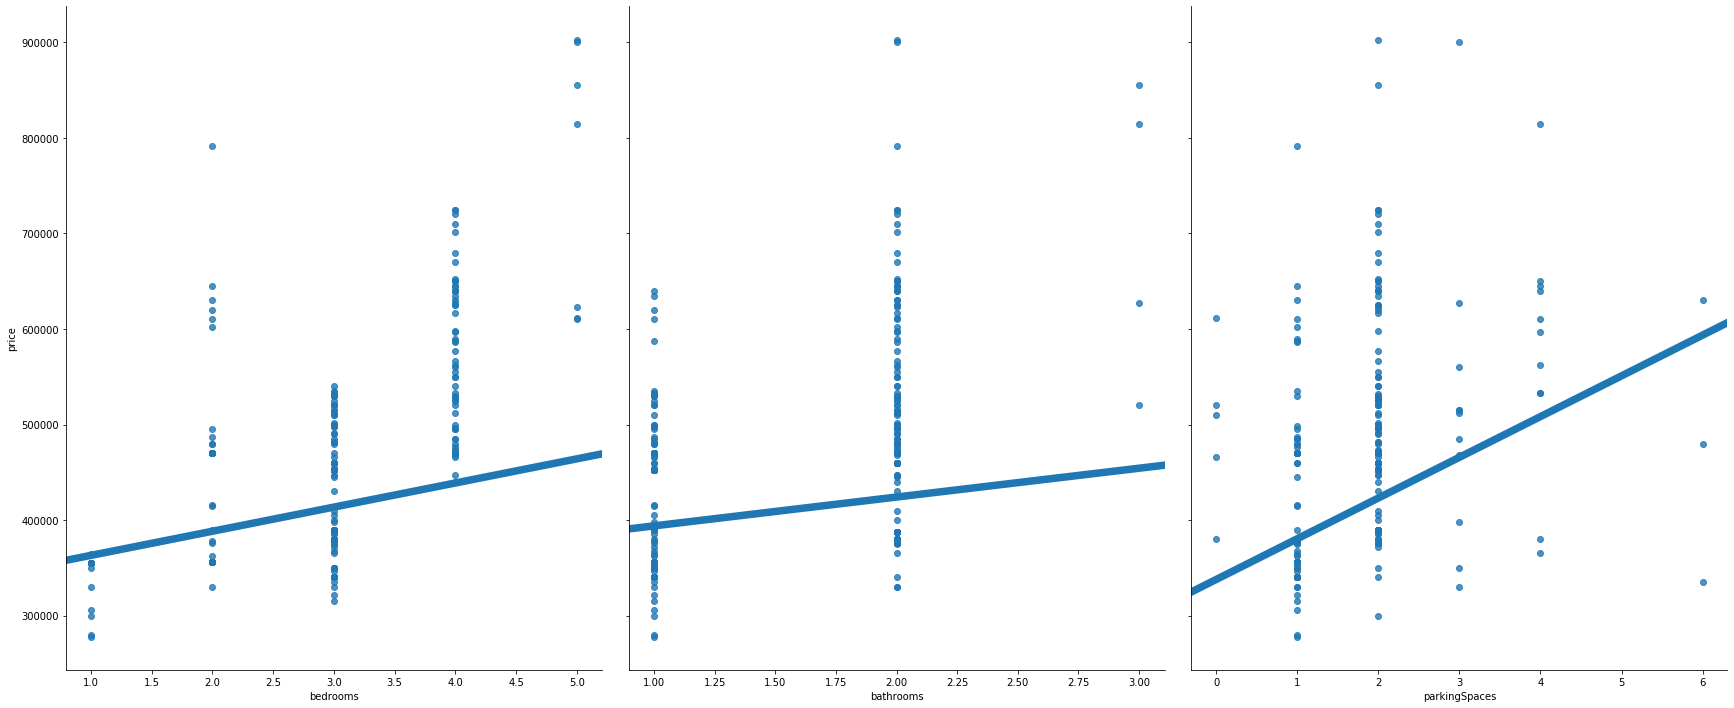

In [56]:
sns.pairplot(df10, x_vars=['bedrooms', 'bathrooms','parkingSpaces'], y_vars='price', height=10, aspect=0.8,kind='reg')


In [57]:
reg.intercept_

7582873013668046.0

In [58]:
reg.coef_

array([ 1.00489425e+05, -4.19343140e+04,  7.84848212e+04, -7.58287301e+15,
       -7.58287301e+15, -7.58287301e+15, -7.58287301e+15])

In [59]:
def predict_price(propertyType,bedrooms,bathrooms,parkingSpaces):    
    loc_index = np.where(X.columns==propertyType)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = bedrooms
    x[1] = bathrooms
    x[2] = parkingSpaces
    if loc_index >= 0:
        x[loc_index] = 1
    print("Estimated price in dollars:")
    return reg.predict([x])[0]

In [60]:
predict_price('unit',4, 2, 2)

Estimated price in dollars:


593386.0

In [61]:
predict_price('house','5','5','4')

Estimated price in dollars:


610496.0

In [62]:
predict_price('unit','2','1','1')

Estimated price in dollars:


355857.0

In [63]:
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)

y_train_predict = dt_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(y_train, y_train_predict)))
r2 = round(dt_model.score(X_train, y_train),2)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")


The model performance for training set
--------------------------------------
RMSE is 15107.601184276078
R2 score is 0.91




In [64]:
y_pred = dt_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(y_test, y_pred)))
r2 = round(dt_model.score(X_test, y_test),2)

print("The model performance for test set")
print("--------------------------------------")
print("Root Mean Squared Error: {}".format(rmse))
print("R^2: {}".format(r2))
print("\n")

The model performance for test set
--------------------------------------
Root Mean Squared Error: 14709.135632699868
R^2: 0.91




Text(0.5, 0, 'Predicted price')

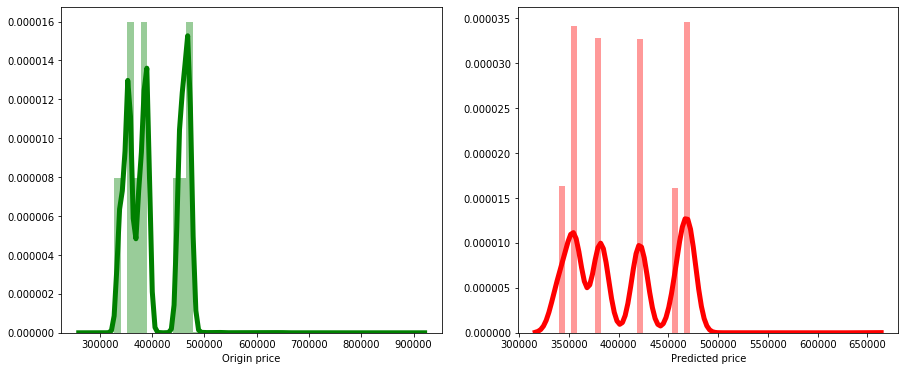

In [65]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.distplot(df11["price"], bins=50, color='green')
plt.xlabel('Origin price')
plt.subplot(1,2,2)
sns.distplot(y_pred, bins=50, color='red')
plt.xlabel('Predicted price')

In [66]:
def predict_price_dt(propertyType,bedrooms,bathrooms,parkingSpaces):    
    loc_index = np.where(X.columns==propertyType)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = bedrooms
    x[1] = bathrooms
    x[2] = parkingSpaces
    if loc_index >= 0:
        x[loc_index] = 1
    print("Estimated price in dollars:")
    return dt_model.predict([x])[0]

In [67]:
predict_price_dt('unit',4, 2, 2)

Estimated price in dollars:


640001.0

In [68]:
predict_price_dt('unit',2, 1, 1)

Estimated price in dollars:


356048.3870967742

[Text(885.6627906976745, 2065.6800000000003, 'X[0] <= 3.5\nmse = 2491215554.615\nsamples = 41779\nvalue = 406029.303'),
 Text(476.8953488372093, 1848.2400000000002, 'X[5] <= 0.5\nmse = 2194265981.912\nsamples = 37582\nvalue = 398699.477'),
 Text(437.9651162790698, 1630.8000000000002, 'X[0] <= 1.5\nmse = 1937507455.864\nsamples = 33379\nvalue = 390978.841'),
 Text(272.51162790697674, 1413.3600000000001, 'X[2] <= 1.5\nmse = 2926500.067\nsamples = 4133\nvalue = 354951.367'),
 Text(233.58139534883722, 1195.92, 'mse = 2196234.569\nsamples = 4132\nvalue = 354964.666'),
 Text(311.4418604651163, 1195.92, 'mse = 0.0\nsamples = 1\nvalue = 300000.0'),
 Text(603.4186046511628, 1413.3600000000001, 'X[3] <= 0.5\nmse = 2001549262.527\nsamples = 29246\nvalue = 396070.189'),
 Text(389.3023255813954, 1195.92, 'X[2] <= 1.5\nmse = 1269068248.705\nsamples = 25122\nvalue = 383888.912'),
 Text(194.6511627906977, 978.48, 'X[6] <= 0.5\nmse = 85920101.202\nsamples = 8357\nvalue = 348134.737'),
 Text(155.7209302

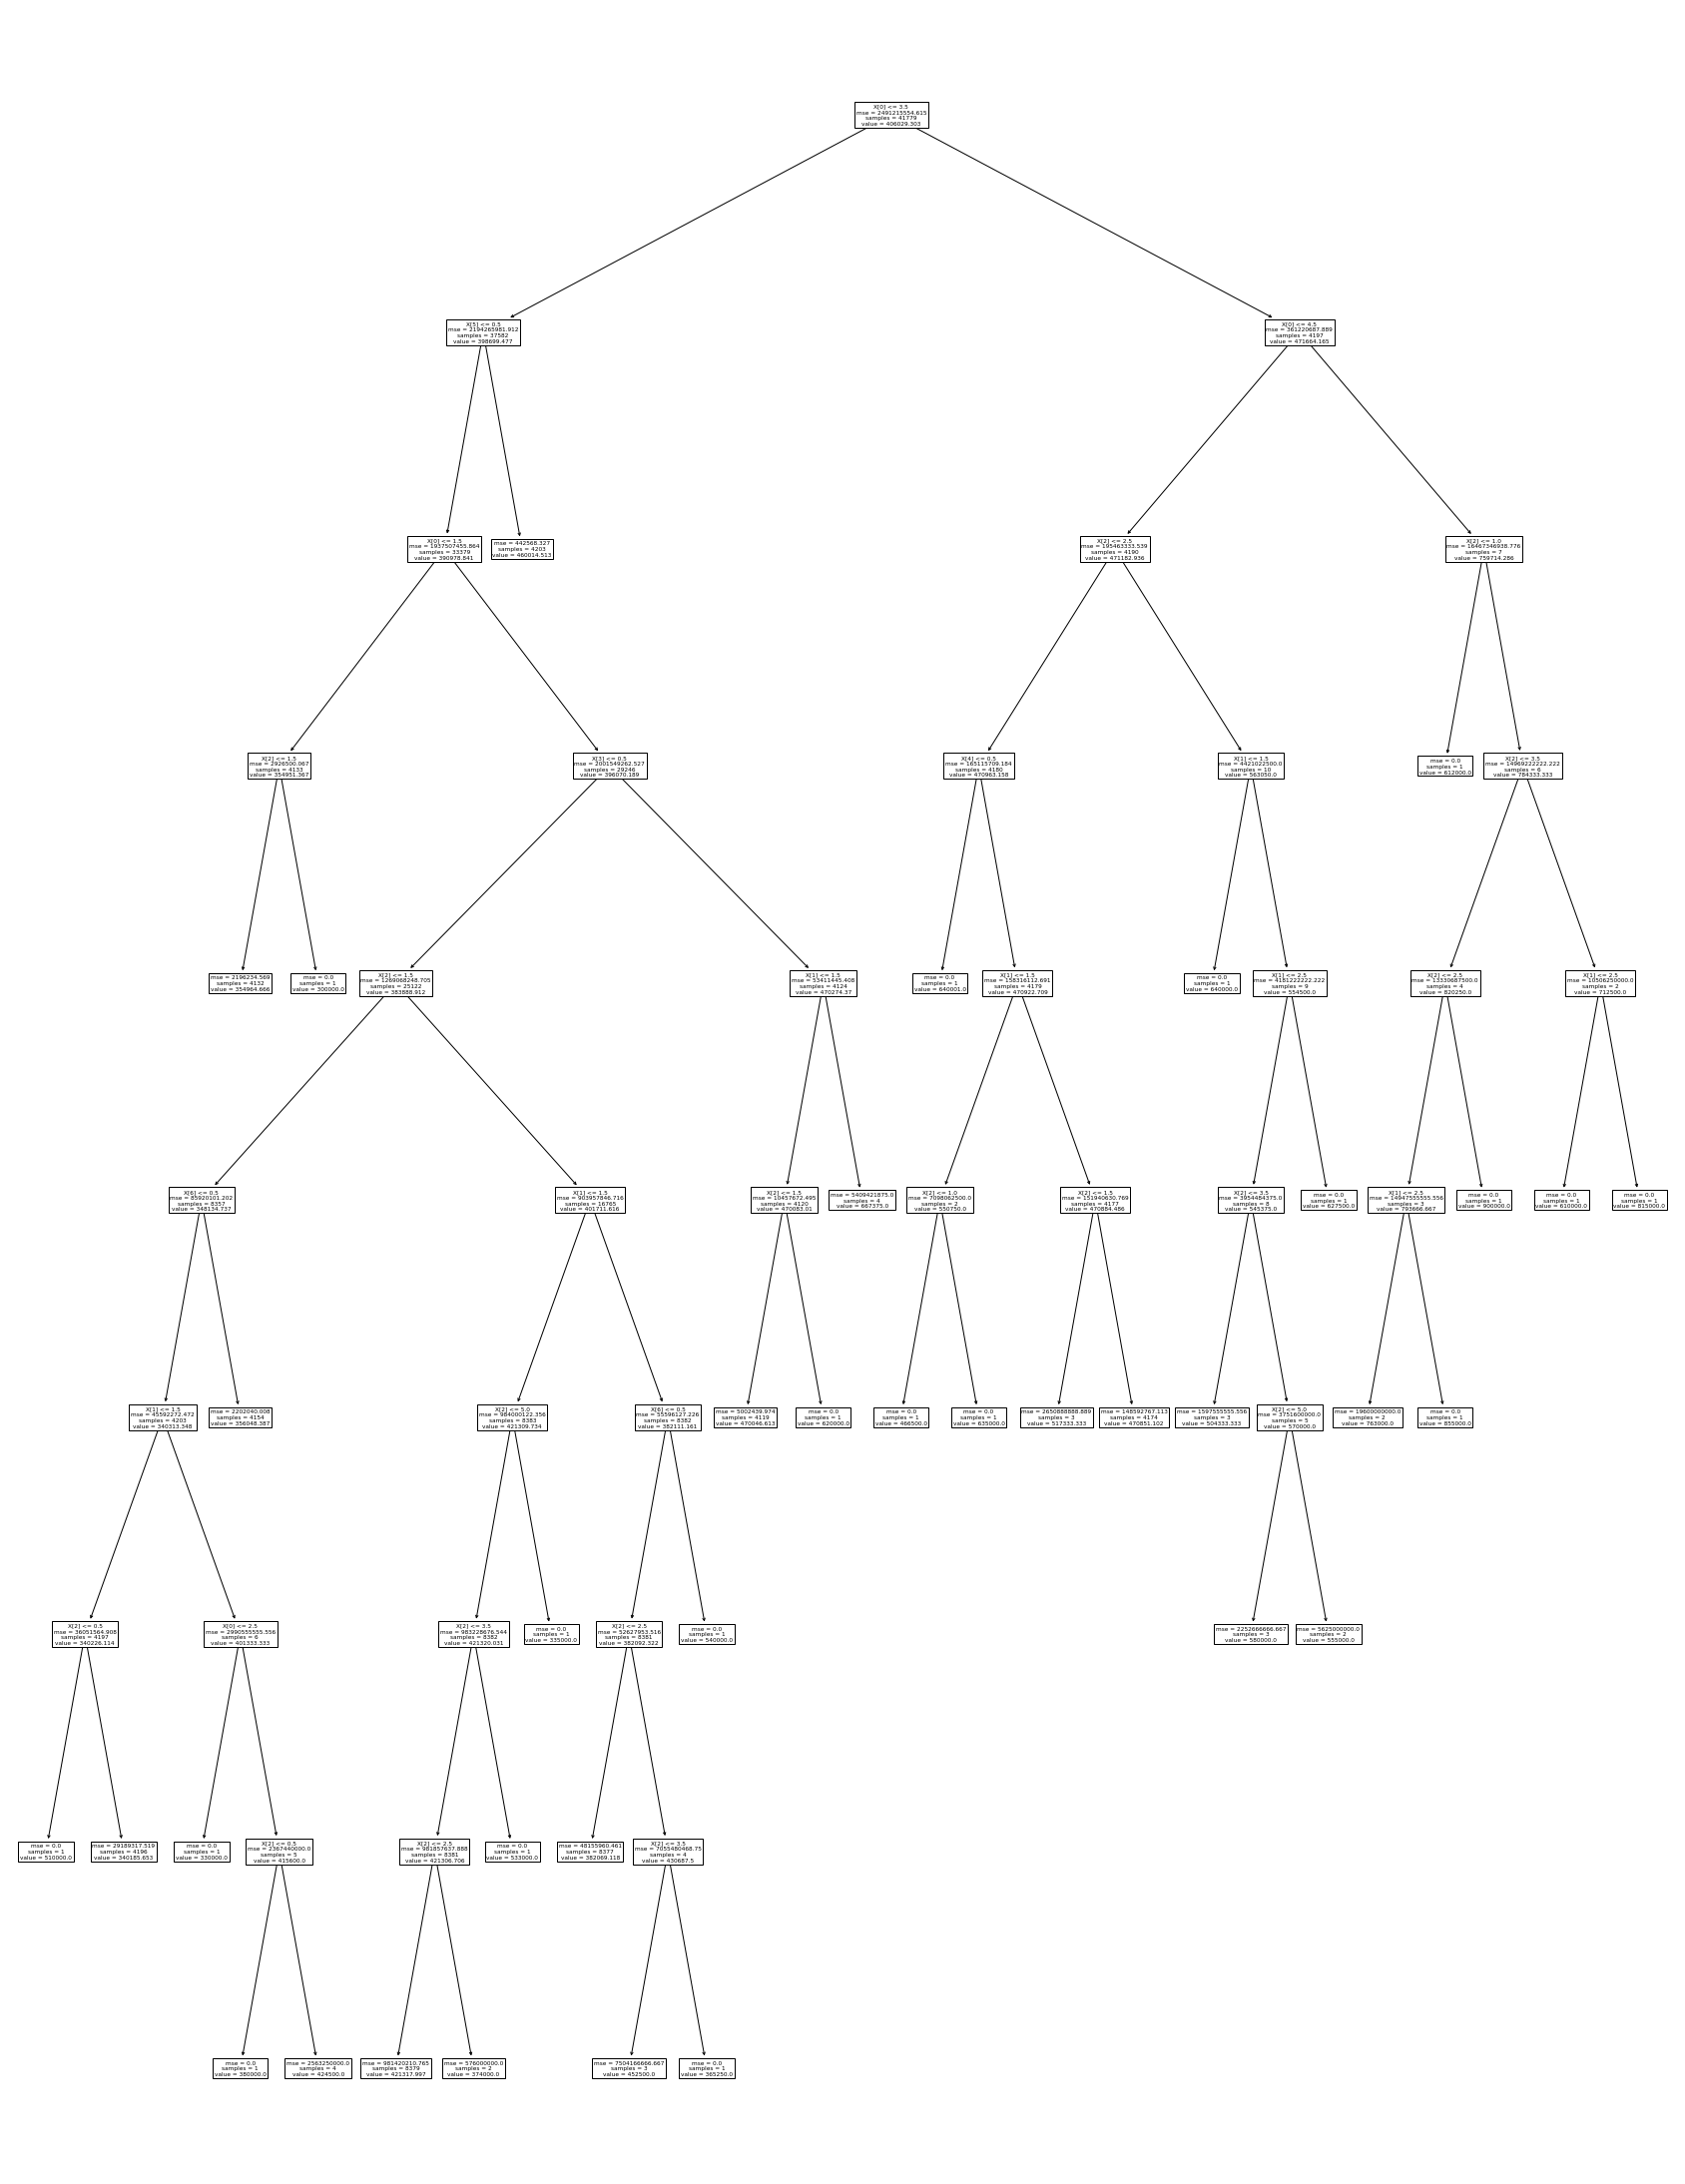

In [69]:
from sklearn import tree
matplotlib.rcParams["figure.figsize"] = (30,40)
tree.plot_tree(dt_model)

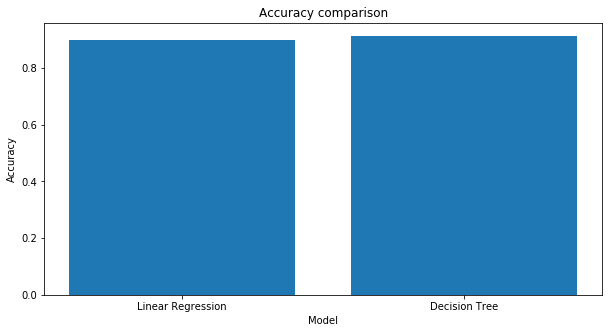

['Linear Regression', 'Decision Tree']
[0.8982777432937485, 0.9127097560152067]


In [71]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (10,5)
dt=dt_model.score(X_test,y_test)
lr=reg.score(X_test,y_test)
y=[lr,dt]
x=["Linear Regression", "Decision Tree"]
plt.bar(x,y)
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.title("Accuracy comparison")
plt.show()
print(x)
print(y)